# ORIE 4741 Midterm Report

In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed EarCut_jll ─ v2.1.5+1
No Changes to `~/.julia/environments/v1.5/Project.toml`
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [5ae413db] ↑ EarCut_jll v2.1.5+0 ⇒ v2.1.5+1
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
Random.seed!(13)

using CSV
using Plots
using DataFrames
using Statistics

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


Load Data:

In [3]:
df = CSV.read("shootings.csv")

,id,name,date,manner_of_death,armed
,Int64,String,Date…,String,String
1,3,Tim Elliot,2015-01-02,shot,gun
2,4,Lewis Lee Lembke,2015-01-02,shot,gun
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon
5,9,Michael Rodriguez,2015-01-04,shot,nail gun
6,11,Kenneth Joe Brown,2015-01-04,shot,gun
7,13,Kenneth Arnold Buck,2015-01-05,shot,gun
8,15,Brock Nichols,2015-01-06,shot,gun
9,16,Autumn Steele,2015-01-06,shot,unarmed


Descriptive Statistics of the Data:

In [16]:
describe(df[:age])

Summary Stats:
Length:         4895
Missing Count:  0
Mean:           36.549750
Minimum:        6.000000
1st Quartile:   27.000000
Median:         35.000000
3rd Quartile:   45.000000
Maximum:        91.000000
Type:           Float64


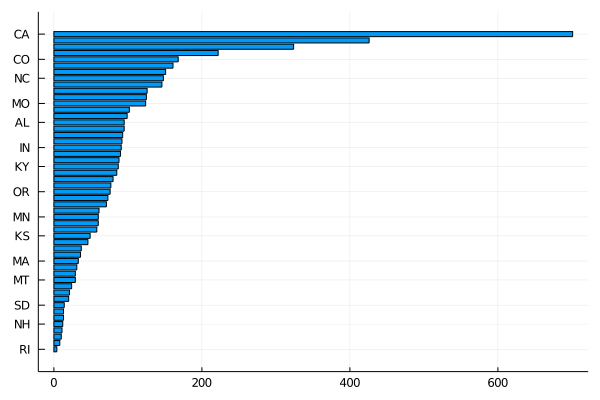

In [33]:
shootings_by_state = sort(by(df, :state, N_reports = :state => length), :N_reports)

bar(shootings_by_state[:, 1], shootings_by_state[:, 2], orientation = :horizontal, legend=false)

In [46]:
shootings_by_state[:51,:]

,state,N_reports
,String,Int64
51,CA,701


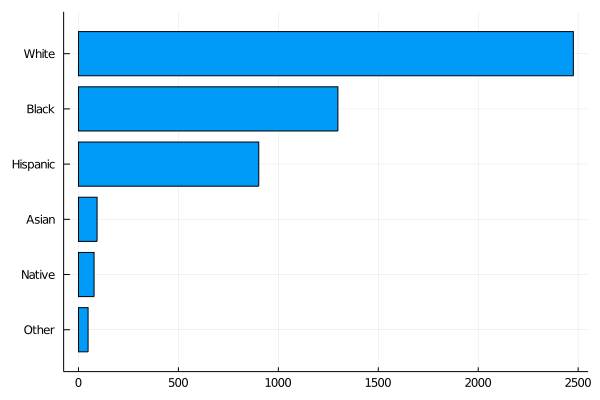

In [35]:
race = sort(by(df, :race, N_reports = :race => length), :N_reports)
bar(race[:, 1], race[:, 2], orientation = :horizontal, legend=false)

In [38]:
race

,race,N_reports
,String,Int64
1,Other,48
2,Native,78
3,Asian,93
4,Hispanic,902
5,Black,1298
6,White,2476


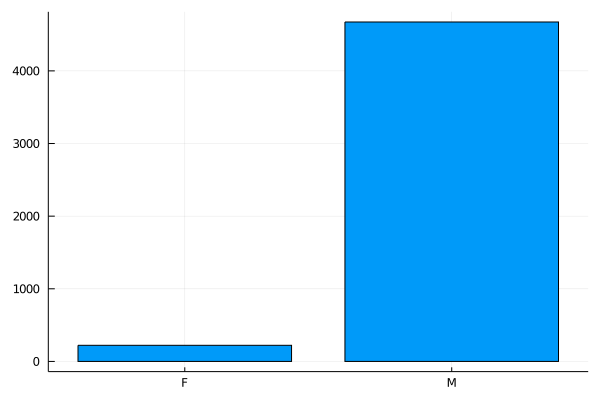

In [37]:
gender = sort(by(df, :gender, N_reports = :gender => length), :N_reports)
bar(gender[:, 1], gender[:, 2], orientation = :vertical, legend=false)

Dividing data into test and training set

In [20]:
df = df[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random

train_proportion = 0.8
n = size(df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))


#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train = df[1:ntrain, :]
# the following variable records the features of examples in the test set
test = df[ntrain:n, :]


# let's take a look
train

Size of dataset: 4895


,id,name,date,manner_of_death,armed,age
,Int64,String,Date…,String,String,Float64
1,2329,Willard Eugene Scott,2017-02-12,shot,gun,31.0
2,1237,Antronie Scott,2016-02-04,shot,unarmed,36.0
3,2386,Michael T. Stoudt,2017-02-24,shot,gun,62.0
4,2558,Cedric Jamal Mifflin,2017-05-07,shot,unknown,27.0
5,4775,Edtwon Stamps,2019-06-06,shot,gun,27.0
6,912,Brent Brannon,2015-10-14,shot,gun,27.0
7,208,Clifton Reintzel,2015-03-14,shot,knife,53.0
8,2035,Ashley Sides,2016-10-31,shot,gun,31.0
9,2598,Carlos Garcia Petrovich,2017-05-21,shot,unarmed,37.0
